In [1]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
from skimage import morphology as morph
from scipy.ndimage import label as scilabel
from scipy.ndimage.morphology import binary_fill_holes as fill_holes
import pickle
import matplotlib; matplotlib.rcParams['figure.dpi']=300
import matplotlib.pyplot as plt

In [59]:
with open("./data/breast/011320_002_N_HR_dict.pkl", "rb") as input_file:
    metal_data = pickle.load(input_file)
append_count = 0
for i_index in list(metal_data['metals'].keys()):
    i = metal_data['metals'][i_index]
    if append_count == 0:
        all_metals = i
        continue
    all_metals += i
    append_count += 1

In [60]:
with open("./data/colon/colon_metals.pkl", "rb") as input_file:
    metal_data = pickle.load(input_file)
append_count = 0
for i_index in list(metal_data['metals'].keys()):
    i = metal_data['metals'][i_index]
    if append_count == 0:
        all_metals = i
        continue
    all_metals += i
    append_count += 1

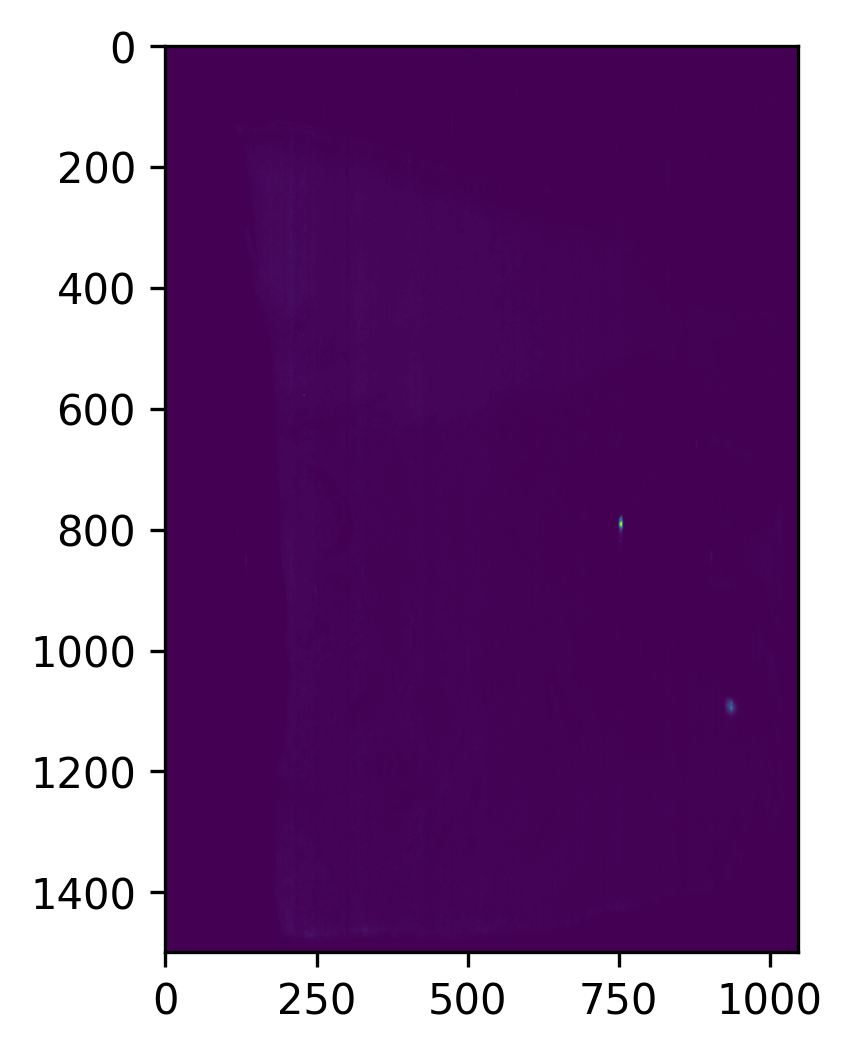

In [52]:
plt.imshow(all_metals)

In [61]:
padded_metal_image = all_metals
padded_metal_image[padded_metal_image <= 0] = 0.000001
padded_metal_image = np.nan_to_num(padded_metal_image, nan=0.000001)
padded_metal_image = np.log(padded_metal_image)+10
# if vmin and vmax:
#     c_norm = Colors_Normalize(vmin=np.percentile(padded_metal_image, vmin), 
#                             vmax=np.percentile(padded_metal_image, vmax), clip=True)
#     padded_metal_image_normalized = c_norm(padded_metal_image)
# else:
padded_metal_image_normalized = (padded_metal_image - padded_metal_image.min()) / (padded_metal_image.max() - padded_metal_image.min())
cmap_jet = plt.cm.get_cmap('jet')
padded_metal_image_rgb = cmap_jet(padded_metal_image_normalized)



padded_metal_image_rgb = padded_metal_image_rgb[:, :, :3]
target_color_to_white = padded_metal_image_rgb[0, 0, :]
replacement_color_to_white = np.array([1, 1, 1])
mask_to_white = np.all(padded_metal_image_rgb == target_color_to_white, axis=-1)
padded_metal_image_rgb[mask_to_white] = replacement_color_to_white

padded_metal_image_rgb = padded_metal_image_rgb[:, :, :3]
target_color_to_white = padded_metal_image_rgb[-1, 0, :]
replacement_color_to_white = np.array([1, 1, 1])
mask_to_white = np.all(padded_metal_image_rgb == target_color_to_white, axis=-1)
padded_metal_image_rgb[mask_to_white] = replacement_color_to_white

padded_metal_image_rgb = padded_metal_image_rgb[:, :, :3]
target_color_to_white = padded_metal_image_rgb[0, -1, :]
replacement_color_to_white = np.array([1, 1, 1])
mask_to_white = np.all(padded_metal_image_rgb == target_color_to_white, axis=-1)
padded_metal_image_rgb[mask_to_white] = replacement_color_to_white

padded_metal_image_rgb = padded_metal_image_rgb[:, :, :3]
target_color_to_white = padded_metal_image_rgb[-1, -1, :]
replacement_color_to_white = np.array([1, 1, 1])
mask_to_white = np.all(padded_metal_image_rgb == target_color_to_white, axis=-1)
padded_metal_image_rgb[mask_to_white] = replacement_color_to_white

cv2.imwrite('preprocess_test.jpg', (padded_metal_image_rgb*255).astype(int))
padded_metal_image_rgb = cv2.imread('preprocess_test.jpg')

final_mask=generate_tissue_mask(padded_metal_image_rgb,compression=1,threshold=190,kernel=10,gray_before_close=True, keep_holes = False)

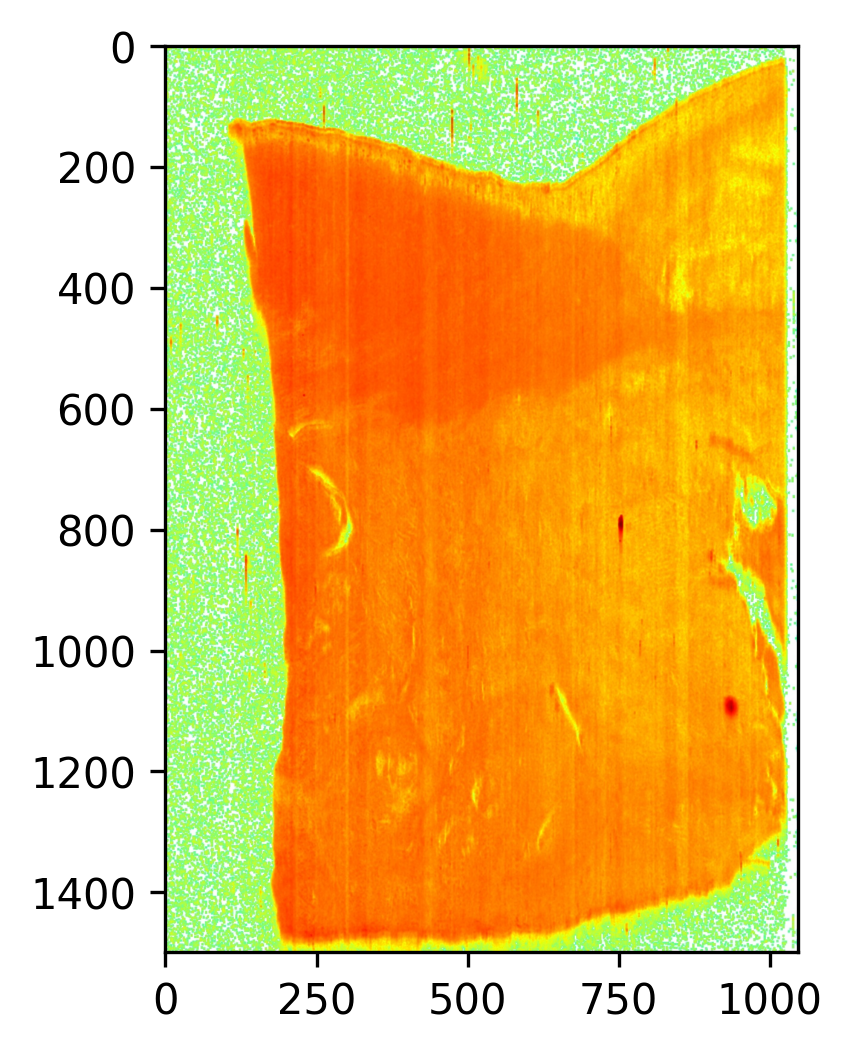

In [65]:
plt.imshow(padded_metal_image_rgb)

In [62]:
contours = measure.find_contours(final_mask, 0.5)

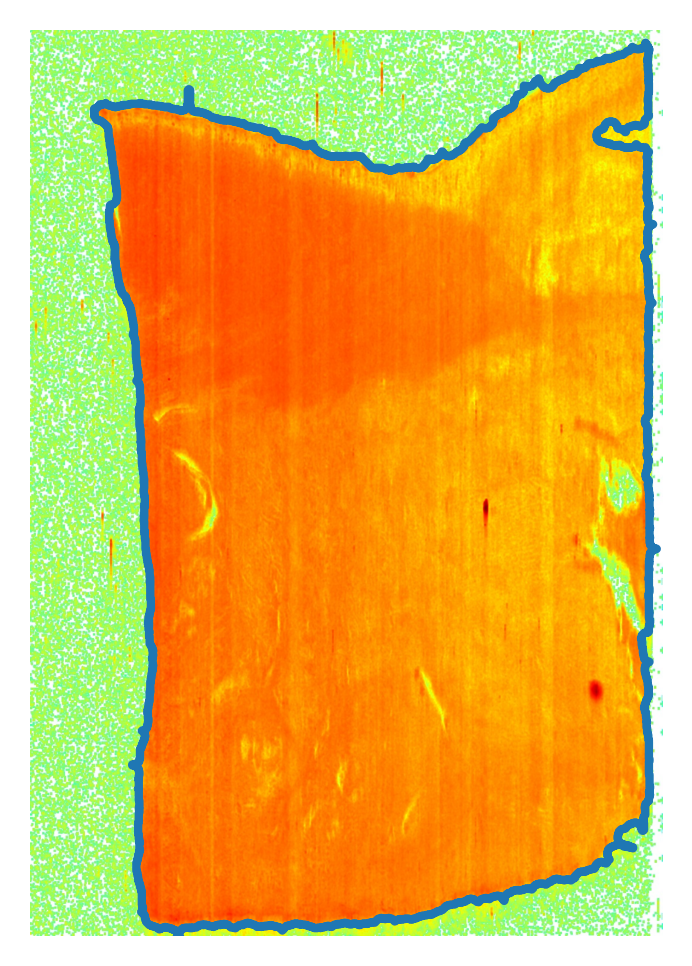

In [69]:
fig, ax = plt.subplots()
ax.imshow(padded_metal_image_rgb, cmap=plt.cm.jet)
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('mask_contour.jpg')
# plt.show()

In [72]:
contour_image = cv2.imread('mask_contour.jpg')

In [73]:
contour_image.shape

(3864, 2771, 3)

In [74]:
input_string = 'VAHDAT_011320_002_N Ca44_ppm matrix'

# Split the string by spaces
split_string = input_string.split()

# Check if there are at least two spaces in the string
if len(split_string) >= 3:
    # Get the substring between the first and second spaces
    result = split_string[1]

    print(result)
else:
    print("Input string doesn't contain at least two spaces.")

Ca44_ppm


In [76]:
import pandas as pd

In [78]:
test = pd.read_excel('/Users/luyunrui/Desktop/Dartmouth/metals_app_data/VAHDAT_011320_002_N Co59_ppm matrix.xlsx')

In [79]:
test.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 793,Unnamed: 794,Unnamed: 795,Unnamed: 796,Unnamed: 797,Unnamed: 798,Unnamed: 799,Unnamed: 800,Unnamed: 801,Unnamed: 802
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
test = ['a', 'b', 'c']
test.remove('a')

In [3]:
test

['b', 'c']

In [12]:
with open("/Users/luyunrui/Desktop/Dartmouth/metals_app_data/011620_002_N_HR_dict.pkl", "rb") as input_file:
    metal_data = pickle.load(input_file)

In [13]:
metal_data.keys()

dict_keys(['svs', 'minmax', 'hne_mask_small', 'metals_mask', 'metals'])

In [14]:
metal_data['svs']

'_SS12251_141731'